# Clean data
## Import dependencies

In [2]:
import sys

import dataframe_visualization_lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Import data

In [3]:
df = pd.read_csv('titanic-train.csv')

## Derive title from name

In [4]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [5]:
df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip()).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [6]:
title_map = {'Mr': 'Mr',
'Miss': 'Miss',
'Mrs': 'Mrs',
'Master': 'Child',
'Dr': 'Dr',
'Don': 'Noble',
'Rev': 'Rev',
'Ms': 'Miss',
'Mme': 'Miss',
'Major': 'Military',
'Col': 'Military',
'Capt': 'Military',
'the Countess': 'Noble',
'Major': 'Military',
'Mlle': 'Miss', 
'Jonkheer': 'Noble',
'Lady': 'Noble',
'Sir': 'Noble'} 

df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
df['Title'] = df.Title.map(title_map)

df['Title'].value_counts()

Mr          517
Miss        186
Mrs         125
Child        40
Dr            7
Rev           6
Military      5
Noble         5
Name: Title, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Replace missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


There is missing Age, Cabin, and Embarked data. 

There is so much missing Cabin data it should probably just be discarded.

Let's look at the distribution for Embarked:

In [9]:
print df['Embarked'].value_counts()
print df['Embarked'].value_counts()/df['Embarked'].value_counts().sum()

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


There is such a high percentage of S cabins and only 3 entries don't have this data filling the blanks with S (highest frequency) is probably rather good:

In [10]:
df['Embarked'].fillna('S',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Let's look at the 'Age' data:

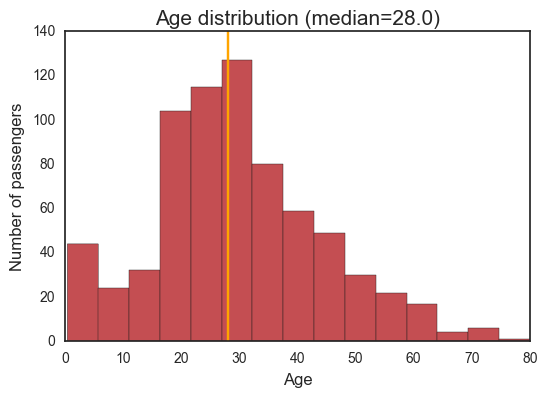

In [11]:
# Obtain median Age
median_age = df['Age'].median()

# Plot a quick histogram of it:
df['Age'].plot.hist(bins=15,color='r')

# Set title
plt.title('Age distribution (median=%.1f)'%(median_age),size=15)

# Set labels
plt.xlabel('Age',size=12)
plt.ylabel('Number of passengers',size=12)

# Add vertical median line
plt.axvline(median_age,color='orange')

The median age can be used to fill in the other data as a first stab.

However, I'm interested in seeing if we can model the age instead. Let's go ahead and one-hot encode the varaibles other than age.

In [12]:
# df['Age'].fillna(median_age,inplace=True)
simulation_df = df.copy()
del simulation_df['PassengerId']
del simulation_df['Cabin']
del simulation_df['Ticket']
del simulation_df['Name']
simulation_df = pd.get_dummies(simulation_df,drop_first=True)
simulation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Fare              891 non-null float64
Sex_male          891 non-null uint8
Embarked_Q        891 non-null uint8
Embarked_S        891 non-null uint8
Title_Dr          891 non-null uint8
Title_Military    891 non-null uint8
Title_Miss        891 non-null uint8
Title_Mr          891 non-null uint8
Title_Mrs         891 non-null uint8
Title_Noble       891 non-null uint8
Title_Rev         891 non-null uint8
dtypes: float64(2), int64(4), uint8(10)
memory usage: 50.5 KB


Now we need to split the data for that has values (not null) for the Age feature so we can use it to train a model that we'll use to replace the N/A values.

In [13]:
age_df = simulation_df[pd.notnull(simulation_df['Age'])]

In [14]:
age_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Dr,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,1,0,0,0
6,0,1,54.0,0,0,51.8625,1,0,1,0,0,0,1,0,0,0
7,0,3,2.0,3,1,21.0750,1,0,1,0,0,0,0,0,0,0
8,1,3,27.0,0,2,11.1333,0,0,1,0,0,0,0,1,0,0
9,1,2,14.0,1,0,30.0708,0,0,0,0,0,0,0,1,0,0
10,1,3,4.0,1,1,16.7000,0,0,1,0,0,1,0,0,0,0


Then we have to split the data into input feature and output feature data:

In [15]:
output_feature = 'Age'
column_names = list(age_df.columns)

# Exclude one of every categorical variable since the other one-hot encodings cover everything
input_features = [x for x in column_names if x != output_feature]

# Split into features and responses
X = age_df[input_features].copy()
y = age_df[output_feature].copy()

Finally, we perform a polynomial regression using degrees 1 to 5 and use GridSearchCV 

In [16]:
%%time 

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

# Feature selection tools
from sklearn.feature_selection import SelectKBest, f_classif

# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Regression tools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Cross validation tools
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

# Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# PolynomialFeature used with LinearRegression is a Polynomial regression
pipeline = Pipeline([('poly',PolynomialFeatures()),('regressor', LinearRegression())])

print pipeline

# Initialize grid search with pipeline
grid_search = GridSearchCV(pipeline, 
                           {'poly__degree': range(1,5)},
                           cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Print grid_search parameters
print grid_search

# Split data into train and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2)

# Perform grid search using train data
grid_search.fit(X_train, y_train)

# Make prediction based on model
y_pred = grid_search.best_estimator_.predict(X_test)

# Print scores
print '\nTraining L2 norm score: ',-grid_search.best_score_
print '\nTest L2 norm score: ', np.sqrt(np.square(y_test-y_pred).sum(axis=0))

print '\nBest parameters:\n'
print grid_search.best_params_

# Fit pipeline with best parameters obtained from grid search using all data
pipeline.set_params(**grid_search.best_params_).fit(X, y)

# Here's how to predict
# y_pred_pipe = pipeline.predict(X_test)

Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'poly__degree': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='neg_mean_squared_error', verbose=0)


/Users/cmshymansky/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/cmshymansky/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)



Training L2 norm score:  130.778892388

Test L2 norm score:  122.282496119

Best parameters:

{'poly__degree': 1}
CPU times: user 407 ms, sys: 147 ms, total: 554 ms
Wall time: 5.59 s


Replace null values with model prediction:

In [17]:
new_data = []
for index, row in simulation_df.iterrows():
    if pd.isnull(row[output_feature]):
        X = row[input_features]
        new_data.append(pipeline.predict(X.values.reshape(1,-1))[0])
    else:
        new_data.append(row[output_feature])
        
simulation_df[output_feature] = new_data

In [18]:
simulation_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Dr,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
0,0,3,22.000000,1,0,7.2500,1,0,1,0,0,0,1,0,0,0
1,1,1,38.000000,1,0,71.2833,0,0,0,0,0,0,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1,0,0,1,0,0,0,0
3,1,1,35.000000,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,3,35.000000,0,0,8.0500,1,0,1,0,0,0,1,0,0,0
5,0,3,35.050324,0,0,8.4583,1,1,0,0,0,0,1,0,0,0
6,0,1,54.000000,0,0,51.8625,1,0,1,0,0,0,1,0,0,0
7,0,3,2.000000,3,1,21.0750,1,0,1,0,0,0,0,0,0,0
8,1,3,27.000000,0,2,11.1333,0,0,1,0,0,0,0,1,0,0
9,1,2,14.000000,1,0,30.0708,0,0,0,0,0,0,0,1,0,0


In [19]:
print output_feature
simulation_df[output_feature]

Age


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      35.050324
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     32.407439
18     31.000000
19     29.338870
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     28.188489
27     19.000000
28     22.297435
29     29.604477
         ...    
861    21.000000
862    48.000000
863     1.302456
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.598194
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.604477
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    17.3014

In [20]:
simulation_df[pd.isnull(simulation_df['Age'])]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Dr,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev


Visualize distributions before and after replacement

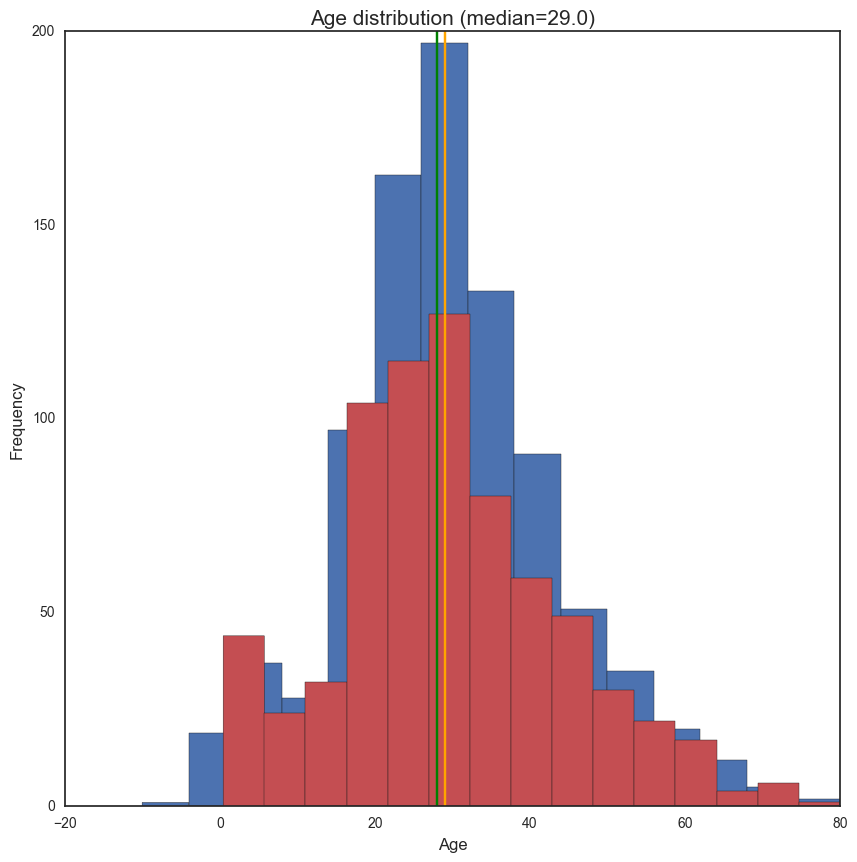

In [21]:
# Obtain median Age
median_age = simulation_df['Age'].median()

# Plot a quick histogram of it:
simulation_df['Age'].plot.hist(bins=15,color='b',figsize=(10,10))

# Set title
plt.title('Age distribution (median=%.1f)'%(median_age),size=15)

# Set labels
plt.xlabel('Age',size=12)
plt.ylabel('Number of passengers',size=12)

# Add vertical median line
plt.axvline(median_age,color='orange')

# Obtain median Age
median_age = df['Age'].median()

# Plot a quick histogram of it:
df['Age'].plot.hist(bins=15,color='r')


# Add vertical median line
plt.axvline(median_age,color='green')

# Visualize to get a feel for data
## Add ages from simulation to original data

In [22]:
df['Age'] = simulation_df['Age']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Trim cabin out since there's so much missing data

In [23]:
trimmed_df = df.copy()

del trimmed_df['Cabin']

trimmed_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


## Trim Name, PassengerId, and Ticket 

In [24]:
del trimmed_df['Name']
del trimmed_df['Ticket']
del trimmed_df['PassengerId']

trimmed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


## Infer categories of features

In [25]:
import dataframe_visualization_lib
reload(dataframe_visualization_lib)

data_types = dataframe_visualization_lib.infer_feature_types(trimmed_df,suppress_report=False)


----------------------------------------
Data type	Feature
----------------------------------------
numerical	Fare
category	Embarked
numerical	Age
category	Title
category	Parch
category	Pclass
category	Sex
category	Survived
category	SibSp
----------------------------------------


SibSp is an integer count, so need to correct that.

In [26]:
data_types['SibSp'] = 'category'

data_types

{'Age': 'numerical',
 'Embarked': 'category',
 'Fare': 'numerical',
 'Parch': 'category',
 'Pclass': 'category',
 'Sex': 'category',
 'SibSp': 'category',
 'Survived': 'category',
 'Title': 'category'}

CPU times: user 10.3 s, sys: 495 ms, total: 10.8 s
Wall time: 11.3 s


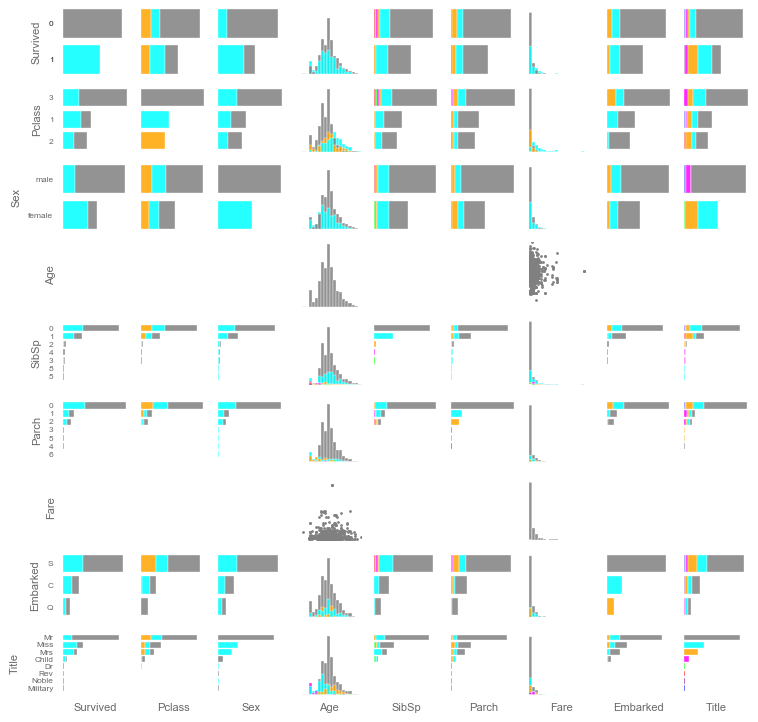

In [52]:
%%time
reload(dataframe_visualization_lib)
dataframe_visualization_lib.compare_data(trimmed_df,
                                         data_types=data_types,fig_size=100)

In [106]:
trimmed_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [47]:
print trimmed_df['Title'].value_counts().sort_values(ascending=False)

Mr          517
Miss        186
Mrs         125
Child        40
Dr            7
Rev           6
Noble         5
Military      5
Name: Title, dtype: int64


CPU times: user 324 ms, sys: 8.73 ms, total: 333 ms
Wall time: 356 ms


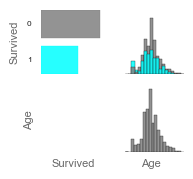

In [35]:
%%time
reload(dataframe_visualization_lib)
dataframe_visualization_lib.compare_data(trimmed_df,data_types=data_types,fig_size=100,
                                         plot_vars=['Survived','Age'])

In [83]:
color

NameError: name 'color' is not defined

In [ ]:
# Sort value counts
sorted_row_value_count_df = df[row_feature].value_counts().sort_values(ascending=False)

# # Get unique counts and values
# sorted_row_values = sorted_row_value_count_df.index.values
# sorted_row_value_counts = sorted_row_value_count_df.values

# # Set tick-labels
# tick_labels = sorted_row_values

# # Set bar and tick-label positions
# bar_positions = np.arange(len(sorted_row_values))
        
# # Get row/column feature value counts
# unique_row_feature_values = sorted_row_values #df[row_feature].value_counts().sort_index().index.values

# col_feature_value_counts = df[col_feature].value_counts().sort_index()
# unique_col_feature_values = col_feature_value_counts.index.values

# # Derive concatenated dataframe
# split_data = {str(unique_col_feature_value): df[row_feature][df[col_feature]==unique_col_feature_value].value_counts().sort_values(ascending=False) \
#               for unique_col_feature_value in unique_col_feature_values}

# # Combine data
# all_value_counts = pd.concat(split_data, axis=1).reset_index().sort_values(by=['index'])

# # Fill N/A count values with zero
# all_value_counts.fillna(0,inplace=True)

# # Initalize value for bottom bar for stacked bar charts
# bottom_bar_buffer = np.zeros(len(all_value_counts))


# for unique_col_feature_value_ind,unique_col_feature_value in enumerate(unique_col_feature_values):                                
#     # Calculate color for bars
#     colorVal = _get_color_val(unique_col_feature_value_ind,len(unique_col_feature_values))

#     # Get data for current col_feature value and column_feature
#     data = all_value_counts[str(unique_col_feature_value)]

#     if unique_col_feature_value_ind:
#         previous_feature_value = unique_col_feature_values[unique_col_feature_value_ind-1]

#         bottom_bar_buffer = bottom_bar_buffer + all_value_counts[str(previous_feature_value)]

#     # Calculate bar positions
#     ind = np.arange(len(all_value_counts))    # the x locations for the groups

#     # Set bottom plot keyword arguments
#     plot_kwargs = {
#         'color': colorVal,
#         'left': bottom_bar_buffer,
#         'align': 'center'
#     }
#     ax.barh(ind,data,**plot_kwargs)

# # Set bar labels if at edge
# if not axis_column_ind:
#     ax.set_yticks(ind)
#     ax.set_yticklabels(unique_row_feature_values,size=label_size)                  